In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
# set theme
plt.style.use('seaborn')
sns.set_style('darkgrid')

<ipython-input-2-c7bd5f3812ab>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
prices = pd.read_csv('finaldata.csv', parse_dates=['Timestamp'], index_col='Timestamp')
prices = prices.apply(lambda col: col.abs() if col.name != 'Timestamp' else col)
prices = prices.dropna(axis=1)
returns = np.log(prices).diff().dropna()


In [4]:
prices

,Instr1,Instr2,Instr3,Instr4,Instr5,Instr6,Instr7,Instr8,Instr9,Instr10,Instr11,Instr12,Instr13,Instr16,Instr17
Timestamp,,,,,,,,,,,,,,,
2016-03-11,1.416659,1.420558,1.426727,1.426903,1.424853,1.421595,1.414042,1.403588,1.393133,1.382952,1.372094,1.360408,1.351622,1.325976,1.319087
2016-03-14,1.462301,1.472009,1.482483,1.486425,1.485694,1.483600,1.477712,1.468183,1.459244,1.449825,1.439647,1.429297,1.421079,1.398603,1.393041
2016-03-15,1.504228,1.514607,1.527892,1.535233,1.535472,1.533584,1.527089,1.517461,1.508316,1.499284,1.488712,1.477881,1.469107,1.444678,1.438367
2016-03-16,1.419844,1.426643,1.440522,1.448331,1.447591,1.444372,1.437431,1.428227,1.419032,1.410119,1.399115,1.387963,1.378961,1.354871,1.348509
2016-03-17,1.355626,1.360255,1.373846,1.382261,1.383064,1.381734,1.377009,1.370292,1.363145,1.355088,1.345784,1.335752,1.327977,1.306453,1.301592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,0.835726,0.779651,0.811547,0.839093,0.864957,0.887792,0.908630,0.926472,0.941884,0.955530,0.966677,0.975294,0.981823,1.007441,1.015631
2023-12-01,0.626091,0.664025,0.698311,0.730168,0.758640,0.782129,0.802080,0.818593,0.833516,0.846164,0.856458,0.865071,0.871727,0.898892,0.907484
2023-12-04,0.580980,0.625299,0.666123,0.703383,0.737745,0.766944,0.791685,0.813265,0.831472,0.846861,0.859302,0.869422,0.879116,0.910606,0.919412


In [6]:
form_start = '2017-11-20'
form_end = '2020-05-19'
trade_start = '2021-05-20'
trade_end = '2022-11-19'

prices_form = prices[form_start:form_end]
prices_trade = prices[trade_start:trade_end]
returns_form = returns.loc[form_start:form_end]
returns_trade = returns.loc[trade_start:trade_end]

In [7]:

# Calculate Kendall's tau for each pair of stocks
results = pd.DataFrame(columns=['tau'])

for s1 in returns_form.columns:
    for s2 in returns_form.columns:
        if (s1!=s2) and (f'{s2}-{s1}' not in results.index):
            results.loc[f'{s1}-{s2}'] = stats.kendalltau(returns_form[s1], returns_form[s2])[0]



In [8]:
results.to_csv('pairs_tau.csv')
results = pd.read_csv('pairs_tau.csv', index_col=0)
results.sort_values(by='tau')

,tau
Instr1-Instr17,0.483457
Instr1-Instr16,0.500545
Instr2-Instr17,0.540825
Instr1-Instr13,0.555998
Instr2-Instr16,0.558861
...,...
Instr12-Instr13,0.969471
Instr9-Instr10,0.969480
Instr16-Instr17,0.970946
Instr11-Instr12,0.971729


In [9]:
def parse_pair(pair):
    s1 = pair[:pair.find('-')]
    s2 = pair[pair.find('-')+1:]
    return s1,s2

In [10]:
selected_stocks = []
selected_pairs = []

for pair in results.sort_values(by='tau', ascending=False).index:
    s1,s2 = parse_pair(pair)
    if (s1 not in selected_stocks) and (s2 not in selected_stocks):
        selected_stocks.append(s1)
        selected_stocks.append(s2)
        selected_pairs.append(pair)

    if len(selected_pairs) == 25:
        break

In [11]:
print(selected_pairs)

['Instr10-Instr11', 'Instr16-Instr17', 'Instr12-Instr13', 'Instr8-Instr9', 'Instr4-Instr5', 'Instr2-Instr3', 'Instr6-Instr7']


In [12]:
marginals_df = pd.DataFrame(index=selected_stocks, columns=['Distribution', 'AIC', 'BIC', 'KS_pvalue'])

for stock in selected_stocks:
    data = returns_form[stock]
    dists = ['Normal', "Student's t", 'Logistic', 'Extreme']
    best_aic = np.inf
    for dist,name in zip([stats.norm, stats.t, stats.genlogistic, stats.genextreme], dists):
        params = dist.fit(data)
        dist_fit = dist(*params)
        log_like = np.log(dist_fit.pdf(data)).sum()
        aic = 2*len(params) - 2 * log_like
        if aic<best_aic:
            best_dist = name
            best_aic = aic
            best_bic = len(params) * np.log(len(data)) - 2 * log_like
            ks_pval = stats.kstest(data, dist_fit.cdf, N=100)[1]
    marginals_df.loc[stock] = [best_dist, best_aic, best_bic, ks_pval]

In [13]:
marginals_df.head(10)


,Distribution,AIC,BIC,KS_pvalue
Instr10,Student's t,85.3697,98.768134,0.951945
Instr11,Student's t,69.430489,82.828923,0.989564
Instr16,Student's t,61.793953,75.192387,0.893449
Instr17,Student's t,89.319677,102.718112,0.973985
Instr12,Student's t,50.389794,63.788228,0.987593
Instr13,Student's t,50.235298,63.633732,0.963519
Instr8,Student's t,136.112196,149.51063,0.945473
Instr9,Student's t,120.7552,134.153634,0.987082
Instr4,Student's t,295.458824,308.857258,0.985225
Instr5,Student's t,232.673046,246.071481,0.996781


In [14]:
marginals_df[marginals_df['KS_pvalue'] < 0.05]


,Distribution,AIC,BIC,KS_pvalue


In [16]:
pip install git+https://github.com/syrte/ndtest

  Cloning https://github.com/syrte/ndtest to /tmp/pip-req-build-73b76cku
  Running command git clone --filter=blob:none --quiet https://github.com/syrte/ndtest /tmp/pip-req-build-73b76cku
  Resolved https://github.com/syrte/ndtest to commit 29ced2bfd65a3b8f51587cd5aa90ea19aa85e568
  Preparing metadata (setup.py) ... done
  Created wheel for ndtest: filename=ndtest-0.1-py3-none-any.whl size=4838 sha256=d7cf8501ccadb02a65d7e85506a1ba48efea294164c2bb1aada20b83c285a2b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-4zy80zwx/wheels/ff/81/f2/617b1190d5b86d01c2d80a870173cfead2d727180dfe452403
Successfully built ndtest


In [17]:
pip install copulas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.3 MB/s eta 0:00:00


In [18]:
from copulas import *
import ndtest # bivariate Kolmogorov-Smirnov

In [20]:
def log_likelihood(dataframe, model):
  """Calculates the log-likelihood of a dataframe under a model.

  Args:
    dataframe: A Pandas DataFrame containing the data.
    model: A statistical model.

  Returns:
    The log-likelihood of the dataframe under the model.
  """

  log_likelihoods = []
  for i in range(len(dataframe)):
    data_point = dataframe.iloc[i]
    probability = model.predict(data_point)
    log_likelihood = np.log(probability)
    log_likelihoods.append(log_likelihood)

  return np.sum(log_likelihoods)

In [21]:
u


array([0.73600789, 0.42203918, 0.21659626, 0.2540085 , 0.37262872,
       0.47705388, 0.5052346 , 0.86623387, 0.55393267, 0.15454839,
       0.8536859 , 0.22544878, 0.90389283, 0.16243505, 0.13196506,
       0.14063172, 0.91687086, 0.86888868, 0.15929021, 0.50860167,
       0.20968279, 0.18601964, 0.18485777, 0.21698948, 0.1975736 ,
       0.02279462, 0.92045678, 0.28301372, 0.37988568, 0.70435494,
       0.02344902, 0.04440271, 0.94417916, 0.01809081, 0.98733281,
       0.91479161, 0.41679926, 0.94352603, 0.92987697, 0.04265939,
       0.79631851, 0.6238064 , 0.04465356, 0.90830302, 0.94944382,
       0.7791182 , 0.66161605, 0.62877326, 0.07775426, 0.03437351,
       0.90718429, 0.86319066, 0.01124014, 0.96891539, 0.97733922,
       0.96308967, 0.84659625, 0.94885395, 0.51895262, 0.36781513,
       0.09242111, 0.53065554, 0.17612697, 0.08805841, 0.55361219,
       0.35826094, 0.06418291, 0.02597744, 0.02818867, 0.9822298 ,
       0.97993194, 0.91026431, 0.19499474, 0.05752019, 0.22193

In [24]:
copulas_df = pd.DataFrame(index=selected_pairs, columns=['copula', 'parameter', 'aic', 'bic', 'KS_pvalue'])
from copulas.multivariate import GaussianMultivariate


for pair in selected_pairs:
    s1,s2 = parse_pair(pair)
    # fit marginals
    params_s1 = stats.t.fit(returns_form[s1])
    dist_s1 = stats.t(*params_s1)
    params_s2 = stats.t.fit(returns_form[s2])
    dist_s2 = stats.t(*params_s2)
    # apply probability integral transform
    u = dist_s1.cdf(returns_form[s1])
    v = dist_s2.cdf(returns_form[s2])

    best_aic = np.inf

    for copula in [GaussianMultivariate()]:
        copula.fit(u)
        synthetic_data = copula.sample(num_rows=100)
        L =(copula.log_probability_density(synthetic_data))
        aic = 2 * len(copula.to_dict()) - 2 * L
        best_aic = aic
        best_bic = len(copula.to_dict()) * np.log(len(u)) - 2 * L
        best_copula = copula
            # calculate KS-pvalue
        smp = copula.sample(len(u)) # generate sample from fit copula
        copula.fit(v)
        smv = copula.sample(len(v))
        smv=smv.to_numpy()
        smp=smp.to_numpy()
        smv=np.reshape(smv,(643,))
        smp=np.reshape(smp,(643,))
        ks_pval= ndtest.ks2d2s(u,v,smp,smv)
        best_param = copula.to_dict()

    copulas_df.loc[pair] = [best_copula, best_param, best_aic, best_bic, ks_pval]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous

In [25]:
copulas_df.head(10)


,copula,parameter,aic,bic,KS_pvalue
Instr10-Instr11,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[10.10774790277528, 10.009962351540244, 11.576...","[27.972326799725757, 27.874541248490722, 29.44...",0.0
Instr16-Instr17,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[11.8227403933926, 10.06971104030174, 12.30974...","[29.687319290343076, 27.934289937252217, 30.17...",0.0
Instr12-Instr13,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[14.78724768039023, 9.977784404191697, 9.92997...","[32.65182657734071, 27.842363301142175, 27.794...",0.0
Instr8-Instr9,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[10.007838344313924, 11.902420611635078, 9.951...","[27.8724172412644, 29.766999508585556, 27.8161...",0.0
Instr4-Instr5,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[10.558161952460551, 10.085426768758103, 10.59...","[28.422740849411028, 27.950005665708577, 28.46...",0.0
Instr2-Instr3,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[10.025694606447317, 10.766948865174255, 10.90...","[27.890273503397793, 28.63152776212473, 28.773...",0.0
Instr6-Instr7,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[10.14754715793629, 11.805072489345061, 9.9061...","[28.012126054886767, 29.669651386295538, 27.77...",0.0


In [26]:
copulas_df['copula'].unique()


array([GaussianMultivariate(), GaussianMultivariate(),
       GaussianMultivariate(), GaussianMultivariate(),
       GaussianMultivariate(), GaussianMultivariate(),
       GaussianMultivariate()], dtype=object)

In [27]:
copulas_df[copulas_df['KS_pvalue']<0.05]


,copula,parameter,aic,bic,KS_pvalue
Instr10-Instr11,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[10.10774790277528, 10.009962351540244, 11.576...","[27.972326799725757, 27.874541248490722, 29.44...",0.0
Instr16-Instr17,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[11.8227403933926, 10.06971104030174, 12.30974...","[29.687319290343076, 27.934289937252217, 30.17...",0.0
Instr12-Instr13,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[14.78724768039023, 9.977784404191697, 9.92997...","[32.65182657734071, 27.842363301142175, 27.794...",0.0
Instr8-Instr9,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[10.007838344313924, 11.902420611635078, 9.951...","[27.8724172412644, 29.766999508585556, 27.8161...",0.0
Instr4-Instr5,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[10.558161952460551, 10.085426768758103, 10.59...","[28.422740849411028, 27.950005665708577, 28.46...",0.0
Instr2-Instr3,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[10.025694606447317, 10.766948865174255, 10.90...","[27.890273503397793, 28.63152776212473, 28.773...",0.0
Instr6-Instr7,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[10.14754715793629, 11.805072489345061, 9.9061...","[28.012126054886767, 29.669651386295538, 27.77...",0.0


In [29]:
algo_returns = {}
cl = 0.99 # confidence level

for pair in selected_pairs:
    s1,s2 = parse_pair(pair)

    # fit marginals
    params_s1 = stats.t.fit(returns_form[s1])
    dist_s1 = stats.t(*params_s1)
    params_s2 = stats.t.fit(returns_form[s2])
    dist_s2 = stats.t(*params_s2)

    # transform marginals
    u = dist_s1.cdf(returns_form[s1])
    v = dist_s2.cdf(returns_form[s2])

    # fit copula
    best_aic = np.inf
    best_copula = None

    copulas = [GaussianMultivariate()]
    for copula in copulas:
        copula.fit(u)
        synthetic_data = copula.sample(num_rows=118)
        L =np.average(copula.log_probability_density(synthetic_data))
        aic = 2 * len(copula.to_dict()) - 2 * L
        copula.fit(v)
        synthetic_data1 = copula.sample(num_rows=118)
        if aic < best_aic:
            best_aic = aic
            best_copula = copula

    # calculate conditional probabilities
    prob_s1 = []
    prob_s2 = []

    for u,v in zip(dist_s1.cdf(returns_trade[s1]), dist_s2.cdf(returns_trade[s2])):

        prob_s1.append(best_copula.cdf(synthetic_data))
        prob_s2.append(best_copula.cdf(synthetic_data1))
    probs_trade = pd.DataFrame(np.vstack([prob_s1, prob_s2]))

    # calculate positions
    positions = pd.DataFrame(index=probs_trade.index, columns=probs_trade.columns)
    long = False
    short = False

    for t in positions.index:
        # if long position is open
        if long:
            if (probs_trade.loc[t][s1] > 0.5) or (probs_trade.loc[t][s2] < 0.5):
                positions.loc[t] = [0,0]
                long = False
            else:
                positions.loc[t] = [1,-1]

        # if short position is open
        elif short:
            if (probs_trade.loc[t][s1] < 0.5) or (probs_trade.loc[t][s2] > 0.5):
                positions.loc[t] = [0,0]
                short = False
            else:
                positions.loc[t] = [-1,1]


    # calculate returns
    algo_ret = (returns_trade * positions.shift()).sum(axis=1)
    algo_returns[pair] = algo_ret

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous

In [30]:
returns = pd.DataFrame.from_dict(algo_returns)
returns = np.exp(returns) - 1 # convert log-returns to simple returns

In [31]:
total_ret = returns.sum(axis=1) / len(returns.columns) * 2 # double capital (from short positions)


In [48]:

# prices = prices['Adj Close']
cum_ret = prices.pct_change().dropna()

In [49]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(252/len(cumret)) - 1
    rets = pd.DataFrame(cumret).pct_change()
    sharpe = np.sqrt(252) * np.nanmean(rets) / np.nanstd(rets)

    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)

    return total_return, apr, sharpe, maxDD, maxDDD

In [51]:
metrics = pd.DataFrame(index=['Algo'], columns=['Total return', 'APR', 'Sharpe', 'MaxDD', 'MaxDDD'])
metrics.loc['Algo'] = calculate_metrics(np.nancumprod(total_ret + 1))
# metrics.loc['VBR'] = calculate_metrics(np.nancumprod(vbr_ret + 1))
metrics

IndexError: ignored

In [52]:
copulas_df = pd.DataFrame(index=selected_pairs, columns=['copula', 'parameter', 'aic', 'bic', 'KS_pvalue'])
from copulas.multivariate import GaussianMultivariate


for pair in selected_pairs:
    s1,s2 = parse_pair(pair)
    # fit marginals
    params_s1 = stats.t.fit(returns_form[s1])
    dist_s1 = stats.t(*params_s1)
    params_s2 = stats.t.fit(returns_form[s2])
    dist_s2 = stats.t(*params_s2)
    # apply probability integral transform
    u = dist_s1.cdf(returns_form[s1])
    v = dist_s2.cdf(returns_form[s2])

    best_aic = np.inf

    for copula in [GaussianMultivariate()]:
        copula.fit(u)
        synthetic_data = copula.sample(num_rows=100)
        L =(copula.log_probability_density(synthetic_data))
        aic = 2 * len(copula.to_dict()) - 2 * L
        best_aic = aic
        best_bic = len(copula.to_dict()) * np.log(len(u)) - 2 * L
        best_copula = copula
            # calculate KS-pvalue
        smp = copula.sample(len(u)) # generate sample from fit copula
        copula.fit(v)
        smv = copula.sample(len(v))
        smv=smv.to_numpy()
        smp=smp.to_numpy()
        smv=np.reshape(smv,(643,))
        smp=np.reshape(smp,(643,))
        ks_pval= ndtest.ks2d2s(u,v,smp,smv)
        best_param = copula.to_dict()

    copulas_df.loc[pair] = [best_copula, best_param, best_aic, best_bic, ks_pval]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous

In [53]:
returns = pd.DataFrame.from_dict(algo_returns)
returns = np.exp(returns) - 1 # convert log-returns to simple returns

In [54]:
total_ret = returns.sum(axis=1) / len(returns.columns) * 2 # double capital (from short positions)

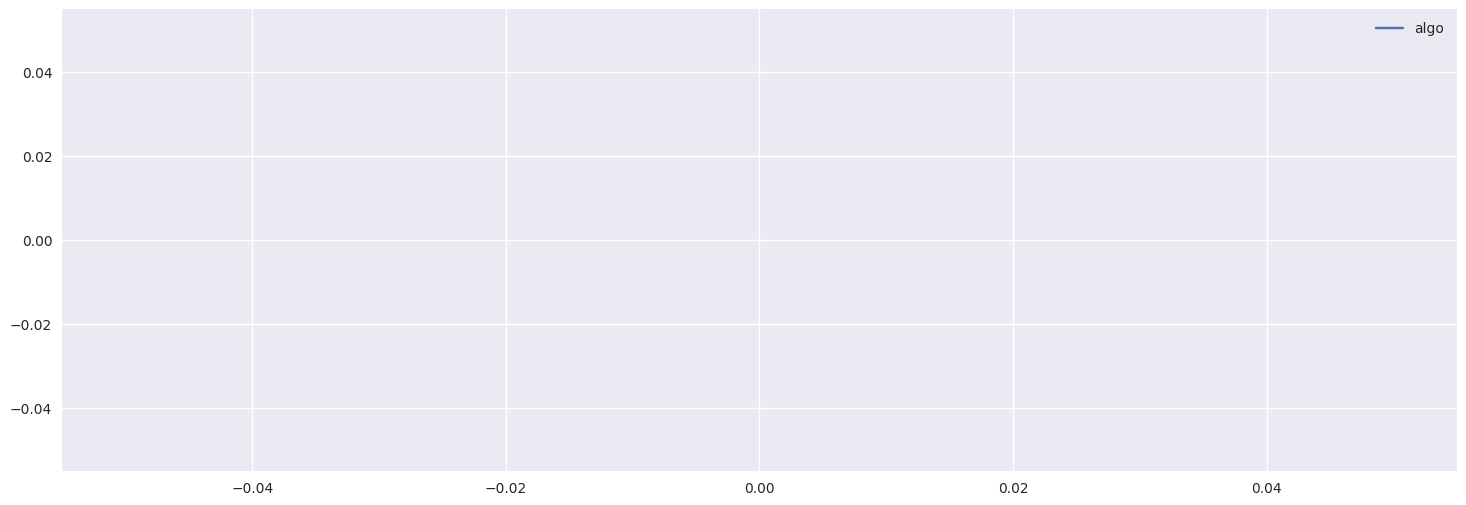

In [55]:
plt.figure(figsize=(18,6))
plt.plot(np.nancumprod(total_ret + 1), label='algo')
# plt.plot(np.nancumprod(vbr_ret + 1), label='VBR')
plt.legend()